In [1]:
%pylab inline
import pickle
import glob
import os
import pandas as pd
import numpy as np
import sys

sys.path.insert(0, ".")

# import seaborn as sns

# sns.set()
# sns.set_style("whitegrid")
# sns.set_context("paper")


def pd_full(rows=100):
    pd.set_option("display.max_rows", rows)
    pd.set_option("display.max_columns", None)
    pd.set_option("display.width", 2000)
    pd.set_option("display.float_format", "{:20,.3f}".format)
    pd.set_option("display.max_colwidth", None)


pd_full()
import wardmetrics
from filternet.training.evalmodel import *
from filternet.training.ensemble_train import *
from filternet.models.reference_architectures import ref_archs

Duplicate key in file '/home/ubuntu/.config/matplotlib/matplotlibrc' line #2.
Duplicate key in file '/home/ubuntu/.config/matplotlib/matplotlibrc' line #3.


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load relevant experiment script
import scripts.run_base_configs_exp as exp
from filternet.training.evalmodel import *
from filternet.training.ensemble_train import *

In [3]:
# Choose a few specific models to plot, so that it's not overwhelming

model_dirs = {
    "4-fold multi_scale_cnn_lstm Ensemble": "saved_models/ensembles_3_4_folds_0",
    "base_cnn_lstm": "saved_models/base_configs_7_cnn_lstm_1",
    "multi_scale_cnn": "saved_models/base_configs_7_multi_scale_cnn_1",
    "base_cnn": "saved_models/base_configs_7_base_cnn_1",
    "deepconvlstm": "saved_models/base_configs_5_deepconvlstm_0",
    "base_lstm": "saved_models/base_configs_7_base_lstm_1",
}

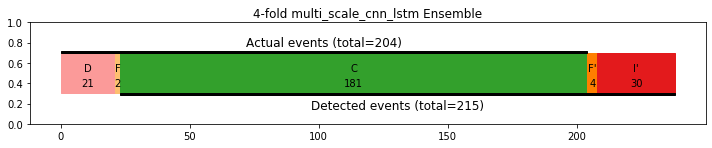

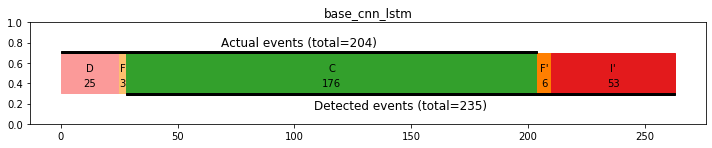

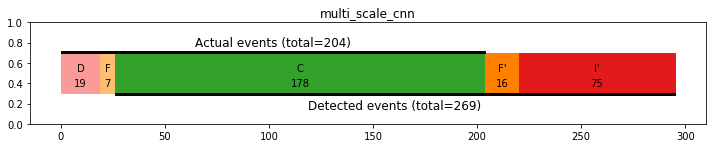

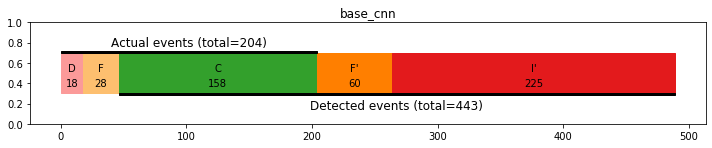

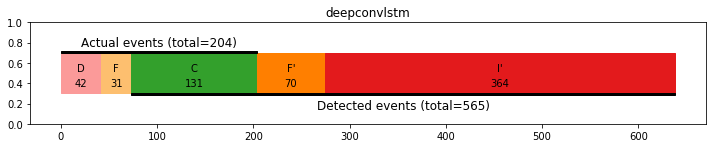

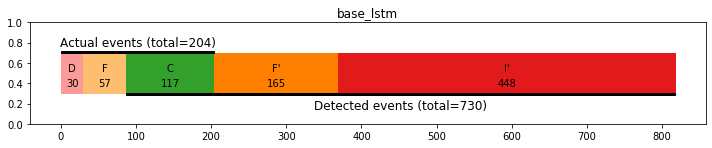

In [4]:
# Open each model and record ward metrics

ds = {}
for model_name, model_dir in model_dirs.items():
    em = load_eval_model_from_dir(model_dir)
    detailed_scores = pd.DataFrame(
        [
            pd.Series(cwm.event_detailed_scores)
            for cwm in em.ward_metrics.class_ward_metrics[1:]
        ]
    ).sum(axis=0)
    wardmetrics.plot_event_analysis_diagram(detailed_scores, show=False)
    title(model_name)
    plt.show()
    em.calc_ward_metrics()
    d = {}
    d["P"] = em.ward_metrics.overall_ward_metrics.event_standard_scores["precision"]
    d["R"] = em.ward_metrics.overall_ward_metrics.event_standard_scores["recall"]
    d["F1"] = 2 * (d["P"] * d["R"]) / (d["P"] + d["R"])
    ds[model_name] = d


In [5]:
df = pd.DataFrame(ds).T
df

,P,R,F1
4-fold multi_scale_cnn_lstm Ensemble,0.860,0.897,0.878
base_cnn_lstm,0.774,0.877,0.823
multi_scale_cnn,0.721,0.907,0.803
base_cnn,0.492,0.912,0.639
deepconvlstm,0.356,0.794,0.491
base_lstm,0.386,0.853,0.532
